In [217]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [218]:
# Read in the data
ks16 = pd.read_csv(r"C:\Users\sunny\Documents\Data\googleplaystore.csv")

In [219]:
# Convert to dataframe
data = pd.DataFrame(ks16)

In [220]:
data.loc[10472] = data.loc[10472].shift()
data['App'].loc[10472] = data['Category'].loc[10472]
data['Category'].loc[10472] = np.nan
data.loc[10472]

C:\Users\sunny\anaconda3\envs\sparta\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


App                       Bloglovin'
Category                         NaN
Rating                        SOCIAL
Reviews                          3.9
Size                            8936
Installs          Varies with device
Type                        500,000+
Price                           Free
Content Rating                     0
Genres                      Everyone
Last Updated                  Social
Current Ver             May 18, 2017
Android Ver       Varies with device
Name: 10472, dtype: object

In [221]:
data['Rating'].unique()

array([nan, 3.9, 4.5, 3.7, 4.0, 4.1, 4.2, 4.3, 4.4, 3.4, 4.6, 4.7, 4.8,
       4.9, 3.5, 3.8, 3.6, 3.2, 3.0, 3.3, 3.1, 2.4, 2.2, 2.5, 2.8, 2.7,
       5.0, 2.0, 1.7, 2.9, 1.8, 2.6, 2.3, 1.6, 1.9, 1.0, 1.5, 1.2, 2.1,
       1.4, 'SOCIAL'], dtype=object)

In [222]:
data['Rating'] = pd.to_numeric(data['Rating'], errors='coerce')
data['Rating'].dtype

dtype('float64')

In [223]:
data['Reviews'].unique()

array([     0., 877635., 877643., ...,  19090.,   9888.,  20535.])

In [224]:
data[data['Reviews'] =='3.0M']

C:\Users\sunny\anaconda3\envs\sparta\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [225]:
data['Reviews'] = data.Reviews.replace("0.0",0)
data['Reviews'] = data.Reviews.replace("3.0M",3000000.0)
data['Reviews'] = data['Reviews'].astype(float)
data['Reviews'].dtype

dtype('float64')

In [226]:
data['Size'].unique()

array(['Varies with device', '1.2M', '1.4M', '10M', '2.1M', '2.6M',
       '3.2M', '33M', '40M', '5.4M', '5.5M', '5.9M', '56M', '7.4M',
       '8.7M', '13M', '76M', '1.3M', '1.5M', '1.6M', '1.7M', '1.8M',
       '1.9M', '10.0M', '100M', '118k', '11k', '11M', '12M', '14M', '15M',
       '16M', '17M', '18M', '19M', '2.0M', '2.2M', '2.3M', '2.4M', '2.5M',
       '2.7M', '2.8M', '2.9M', '201k', '20M', '21M', '22M', '23M', '24M',
       '253k', '25M', '26M', '27M', '28M', '292k', '29M', '3.0M', '3.1M',
       '3.3M', '3.4M', '3.5M', '3.6M', '3.7M', '3.8M', '3.9M', '30M',
       '31M', '32M', '34M', '351k', '35M', '364k', '36M', '37M', '38M',
       '39M', '4.0M', '4.1M', '4.2M', '4.3M', '4.4M', '4.5M', '4.6M',
       '4.7M', '4.8M', '4.9M', '41M', '42M', '43M', '44M', '45M', '46M',
       '47M', '48M', '49M', '5.0M', '5.1M', '5.2M', '5.3M', '5.6M',
       '5.7M', '5.8M', '50M', '51M', '52M', '53M', '540k', '544k', '54M',
       '55M', '57M', '58M', '59M', '6.0M', '6.1M', '6.2M', '6.3M', '6.

In [227]:
data['Size'] = data.Size.replace("Varies with device",np.nan)
data['Size'] = data.Size.str.replace("M","000") # All size values became the kilobyte type.
data['Size'] = data.Size.str.replace("k","")
data['Size'] = data.Size.replace("1,000+","1,000")
data['Size'] =data['Size'].astype(float)
data['Size'].dtype

data['Installs'] = data.Installs.str.replace("M","000") # All size values became the kilobyte type.
data['Installs'] = data.Installs.str.replace(",","")
data['Installs'] = data.Installs.str.replace("+","")
data['Installs'] = data.Installs.replace("Free",np.nan)
data['Installs'].dtype

dtype('O')

In [228]:
data['Installs'] = data['Installs'].astype(int)

ValueError: invalid literal for int() with base 10: 'Varies with device'

In [229]:
data['Installs'].unique()

array(['0', '1000000000', '1000000', '1000', '1', '10000000', '10000',
       '10', '100000000', '100000', '100', '5000000', '5000', '5',
       '50000000', '50000', '50', '500000000', '500000',
       'Varies with device', '500'], dtype=object)

In [230]:
data['Price'].unique()

array(['0', '$394.99', '$30.99', '$200.00', '$2.99', '$399.99', '$154.99',
       '$1.49', '$3.99', '$1.99', '$13.99', '$0.99', '$4.99', '$2.49',
       '$6.99', '$5.99', '$10.00', '$19.99', '$3.49', '$3.08', '$37.99',
       '$9.99', '$1.29', '$29.99', '$7.99', '$1.50', '$379.99', '$1.61',
       '$4.29', '$15.46', '$10.99', '$14.99', '$74.99', '$8.49', '$16.99',
       '$2.56', '$79.99', '$4.84', '$19.40', '$4.49', '$33.99', '$1.70',
       '$7.49', '$5.49', '$28.99', '$109.99', '$2.59', '$11.99', '$17.99',
       '$18.99', '$299.99', '$3.28', '$24.99', '$12.99', '$1.97',
       '$389.99', '$400.00', '$1.59', '$1.20', '$2.95', '$3.90', '$2.50',
       '$3.04', '$1.96', '$25.99', '$2.00', '$89.99', '$6.49', '$3.61',
       '$46.99', '$4.80', '$2.90', '$9.00', '$3.95', '$8.99', '$39.99',
       '$3.02', '$19.90', '$1.26', '$14.00', '$3.88', '$5.00', '$4.59',
       '$1.00', '$4.60', '$4.77', '$1.04', '$4.85', '$2.60', '$1.76',
       '$1.75', 'Free', '$15.99'], dtype=object)

In [231]:
data['Price'] = data.Price.replace("Everyone",np.nan)
data['Price'].dtype

dtype('O')

Text(0.5, 1.0, 'Correlation between Size and Installs')

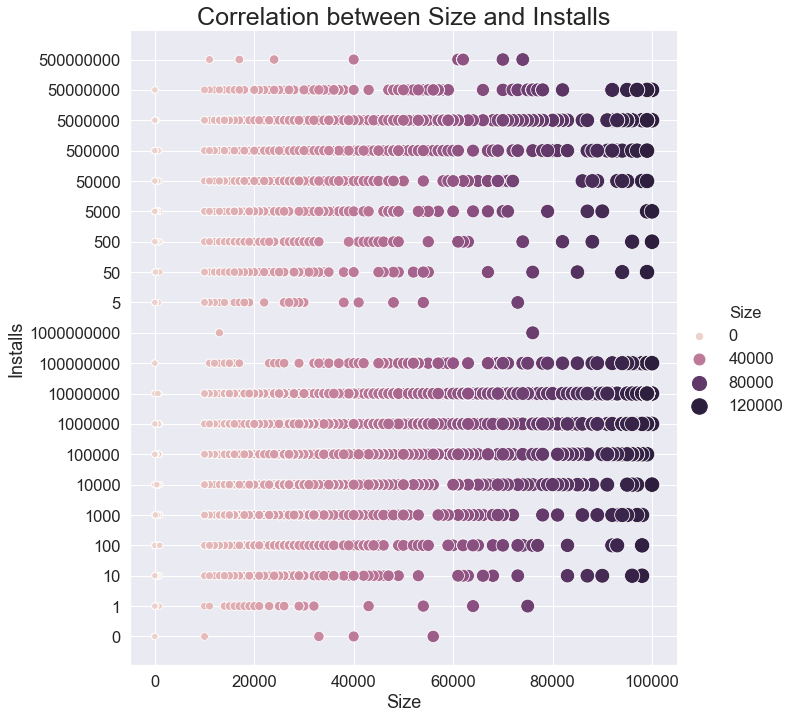

In [232]:
data.sort_values(by='Installs', inplace=True, ascending=True)
sns.relplot(data = data, x = 'Size', y = 'Installs',
            hue="Size", size="Size", height=10, sizes=(40, 240),
           )
ax = plt.gca()
ax.set_title("Correlation between Size and Installs", fontsize=25)

Text(0.5, 1.0, 'Correlation between Installs and Rating')

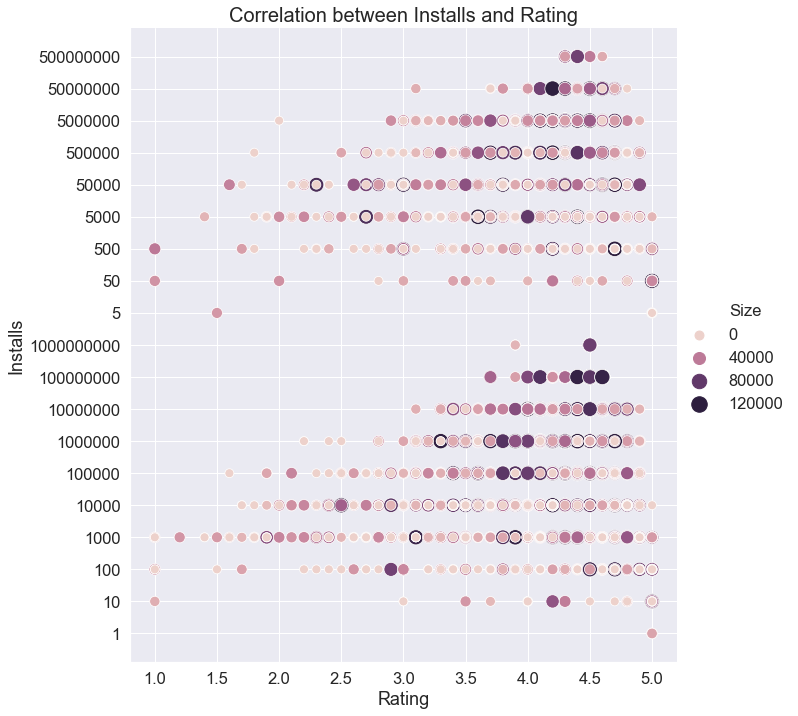

In [164]:
sns.relplot(data = data, x = 'Rating', y = 'Installs',
            hue="Size", size="Size", height=10, sizes=(80, 240),
           )
ax = plt.gca()
ax.set_title("Correlation between Installs and Rating", fontsize=20)